# Optimizing Train Services: Predictive Modeling and Capacity Planning Amidst COVID-19 Dynamics

# Setup environment and install requirements

This code snippet imports the essential libraries for data manipulation and visualization.

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data loader

This code snippet loads the dataset into a pandas DataFrames. It reads the dataset files from the specified file paths using the read_csv function.
*   df contains ridership information for each station.

In [7]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('data/Ridership.csv')
df.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
9973,2019,July,24,30,Corridor_4,y,Station_3,AM Peak,44,1,0
15185,2019,November,7,45,Corridor_1,y,Station_3,Evening,2126,7,0
59162,2022,September,11,36,Corridor_3,n,Station_23,Weekend/Holiday,974,3,0
58980,2022,September,7,36,Corridor_4,y,Station_9,Midday,613,2,0
800,2019,January,15,3,Corridor_7,y,Station_21,AM Peak,4244,5,0
32813,2021,January,1,53,Corridor_1,n,Station_6,Weekend/Holiday,6,2,1
38738,2021,June,10,23,Corridor_4,y,Station_8,AM Peak,179,2,1
2713,2019,February,20,8,Corridor_4,y,Station_8,AM Peak,1476,2,0
31259,2020,November,24,48,Corridor_6,y,Station_3,PM Peak,114,3,1
15128,2019,November,6,45,Corridor_4,y,Station_11,Midday,810,5,0


# Data Exploration

In [9]:
def my_plot(x,y, x_label, y_label, title):
  plt.figure(figsize=(15, 6))
  plt.plot(x,y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

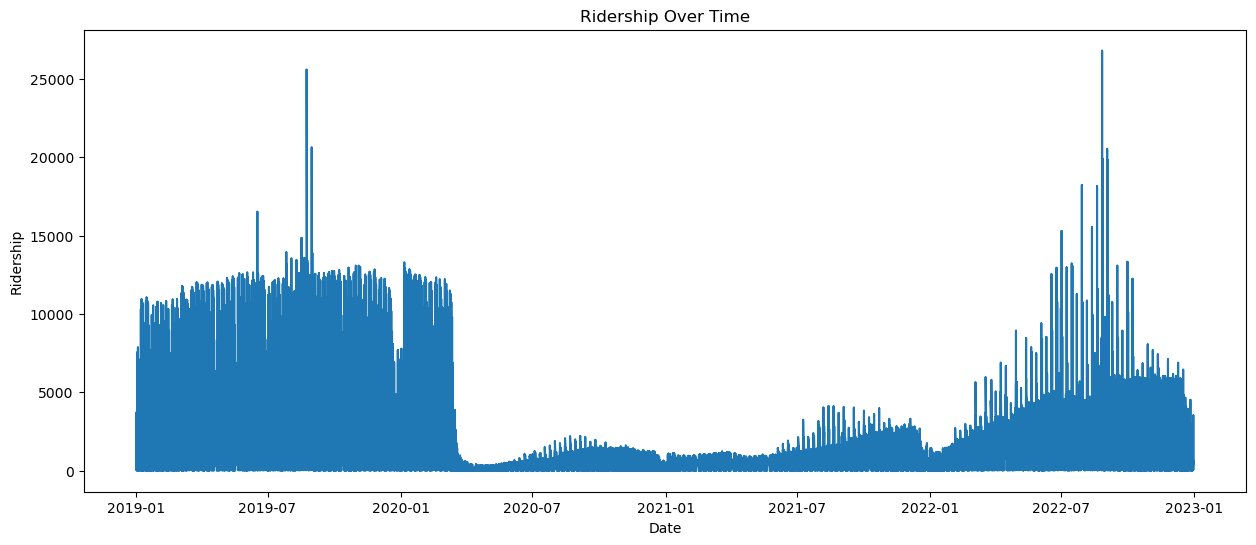

In [10]:
# plot of 'Ridership' over time (day)
df_new = pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str))
my_plot(df_new.iloc[0:], df.iloc[0:, df.columns.get_loc('Ridership')], 'Date','Ridership','Ridership Over Time')

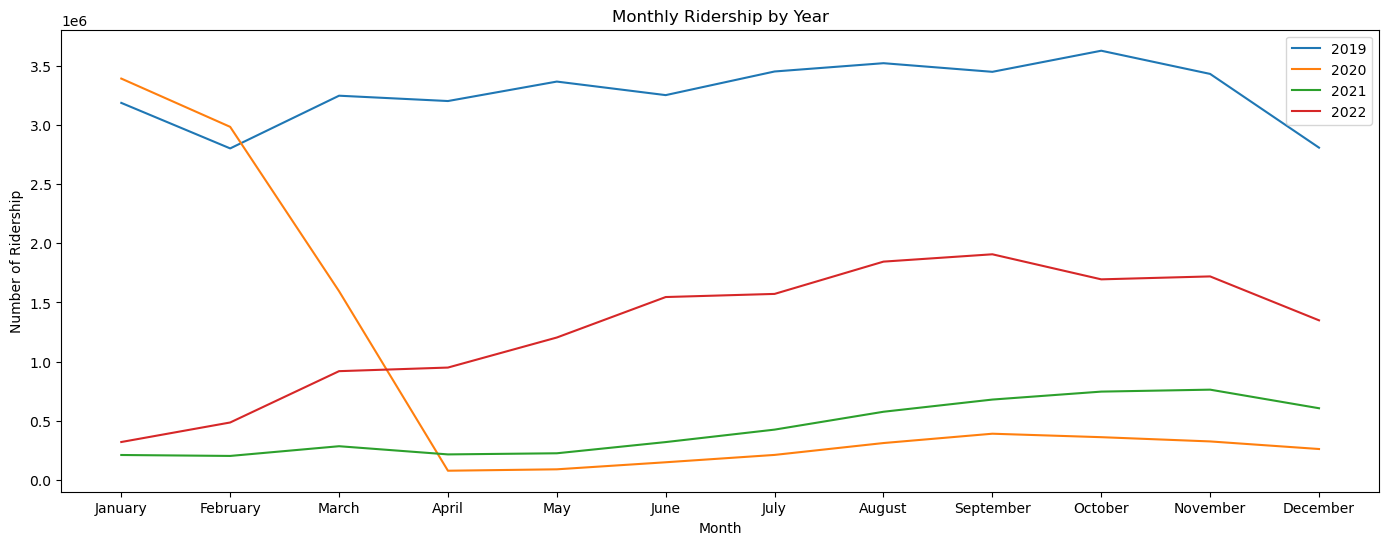

In [11]:
# Lets plot the data based on month of the year for different years
grouped_dataset = df.groupby(['Year', 'Month']).sum().reset_index()
years = grouped_dataset['Year'].unique()

month_mapping = {'January': 1, 'February':2, 'March': 3,
                 'April': 4, 'May': 5, 'June': 6, 'July': 7,
                 'August': 8, 'September': 9, 'October': 10, 
                 'November': 11, 'December': 12
                }


# Map the month names to numbers using the mapping dictionary so that we could sort the months
grouped_dataset['Month_Number'] = grouped_dataset['Month'].map(month_mapping)
grouped_dataset = grouped_dataset.sort_values(by=['Year', 'Month_Number'])

plt.figure(figsize=(17, 6))
for year in years:
    year_data = grouped_dataset[grouped_dataset['Year'] == year]
    plt.plot(year_data['Month'], year_data['Ridership'], label=str(year))

plt.title('Monthly Ridership by Year')
plt.xlabel('Month')
plt.ylabel('Number of Ridership')
plt.legend();

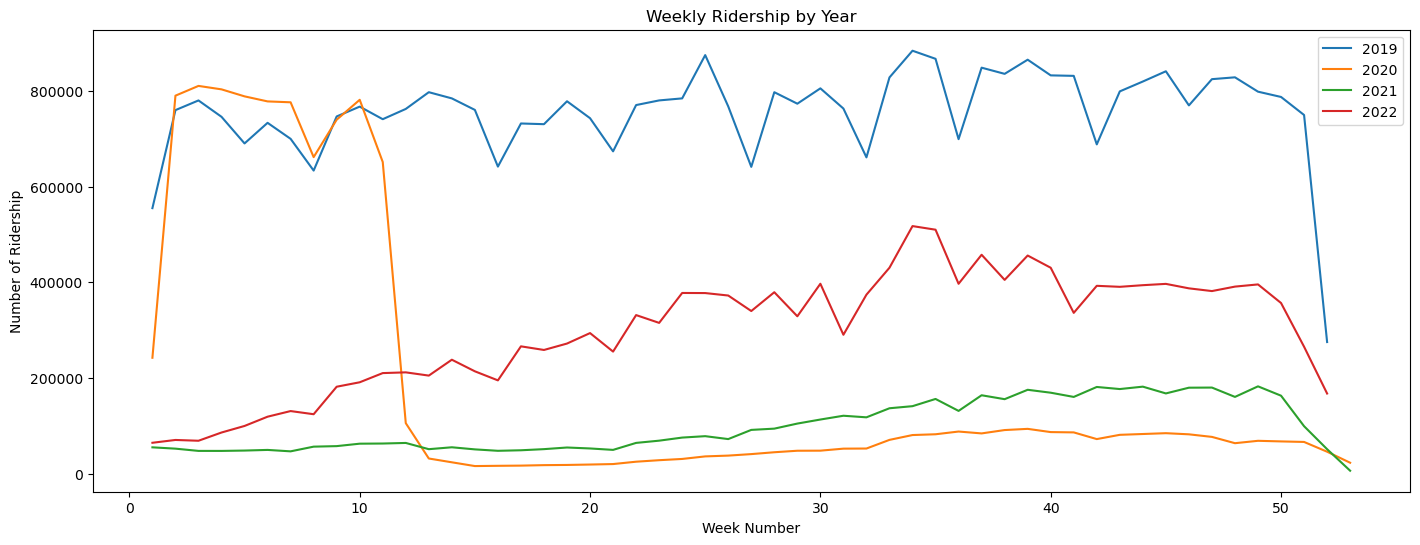

In [12]:
# Lets plot the data based on week of the year for different years
grouped_weekly = df.groupby(['Year', 'Week Number']).sum().reset_index()
years = grouped_weekly['Year'].unique()

plt.figure(figsize=(17, 6))
for year in years:
    year_data = grouped_weekly[grouped_weekly['Year'] == year]
    plt.plot(year_data['Week Number'], year_data['Ridership'], label=str(year))

plt.title('Weekly Ridership by Year')
plt.xlabel('Week Number')
plt.ylabel('Number of Ridership')
plt.legend();

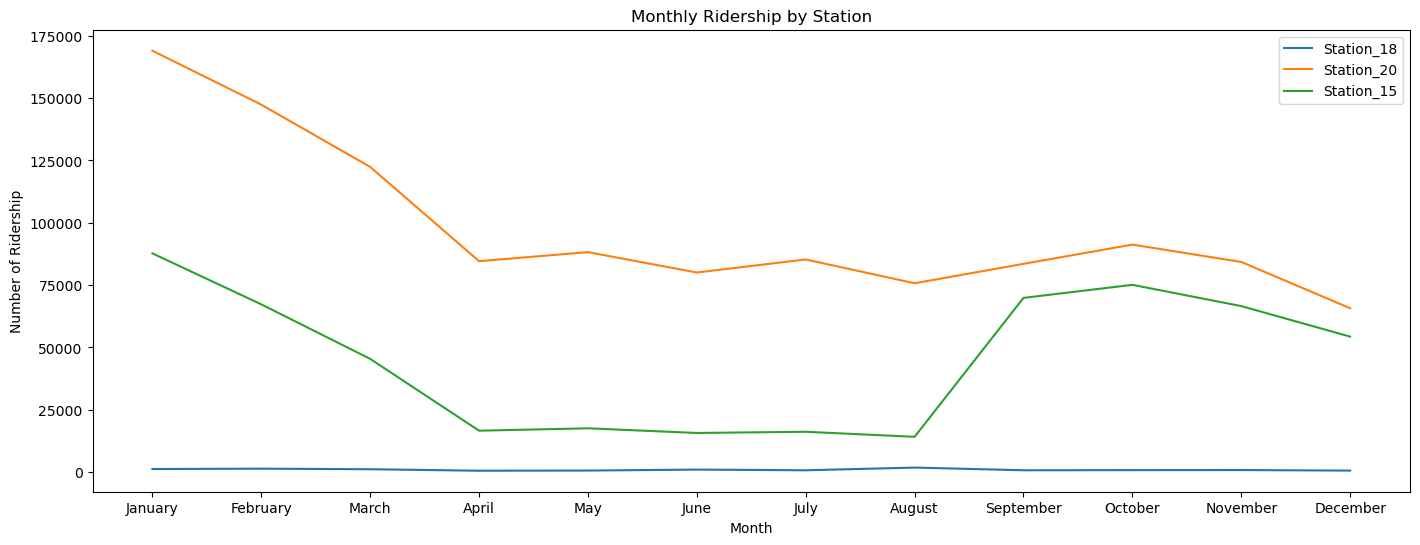

In [13]:
# Lets plot the Monthly Ridership by Station

# Group by Station and Month and calculate the sum of ridership
grouped_stations = df.groupby(['Station', 'Month']).sum().reset_index()
grouped_stations['Month_Number'] = grouped_stations['Month'].map(month_mapping)

# Create a list of unique years for plotting
years = grouped_stations['Year'].unique()
random_stations = grouped_stations['Station'].sample(n=3, random_state=23).unique()

# Sort the DataFrame by Station and Month_Number
grouped_stations = grouped_stations.sort_values(by=['Station', 'Month_Number'])

plt.figure(figsize=(17, 6))

# Plot each station with different symbology
for station in random_stations:
    station_data = grouped_stations[grouped_stations['Station'] == station]
    plt.plot(station_data['Month'], station_data['Ridership'], label=str(station))

plt.title('Monthly Ridership by Station')
plt.xlabel('Month')
plt.ylabel('Number of Ridership')
plt.legend();

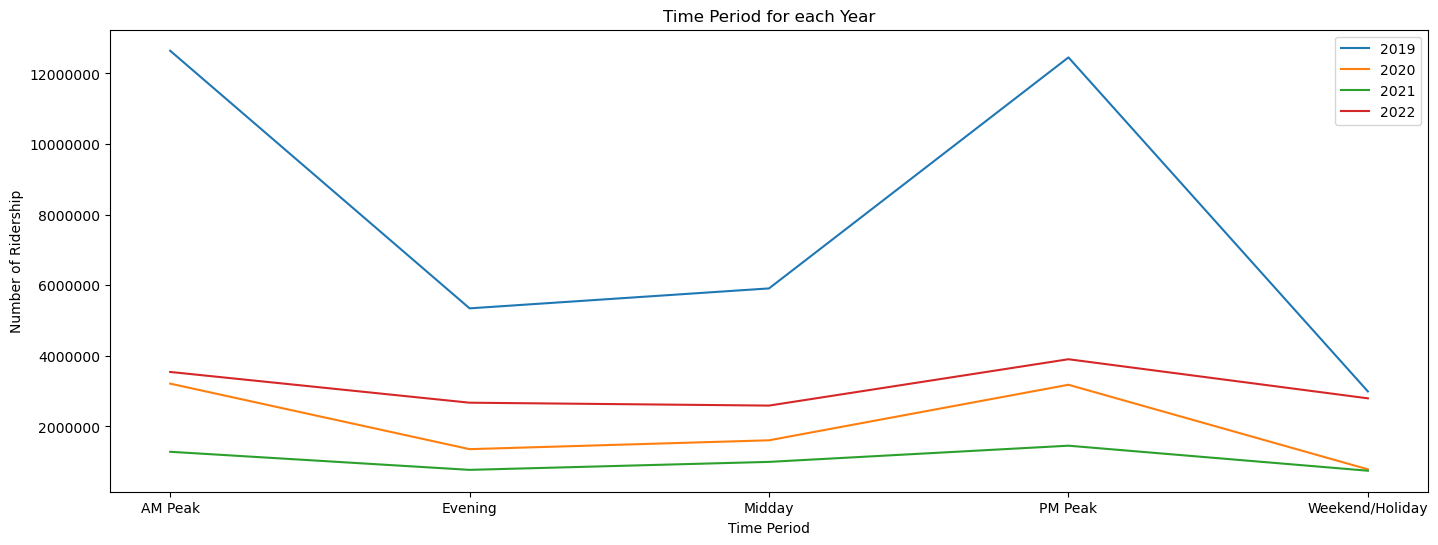

In [14]:
# Lets plot the Ridership per Time Period for each Year

# Group by Year and Time Period and calculate the sum of ridership
grouped_year_time = df.groupby(['Year', 'Period']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM Peak', 'Midday', 'PM Peak', 'Evening', 'Weekend/Holiday']

# Convert 'Time Period' column to a categorical data type with the desired order
grouped_year_time['Period'] = pd.Categorical(grouped_year_time['Period'], categories=time_period_order, ordered=True)

# Create a list of years for plotting
years = grouped_year_time['Year'].unique()

plt.figure(figsize=(17, 6))

# Plot each year with different symbology
for year in years:
    year_data = grouped_year_time[grouped_year_time['Year'] == year]
    plt.plot(year_data['Period'], year_data['Ridership'], label=str(year))

plt.ticklabel_format(style='plain', axis='y')
plt.title('Time Period for each Year')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend();

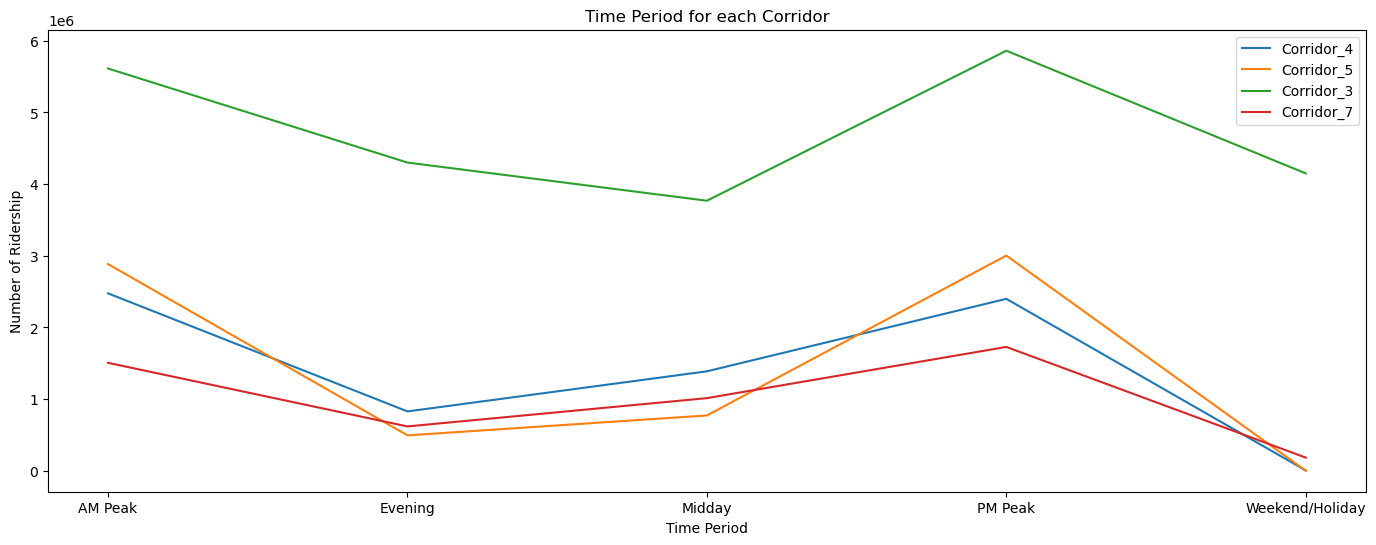

In [15]:
# Lets plot Ridership per Time Period for each Corridor

# Group by Corridor and Time Period and calculate the sum of ridership
grouped_corridor_time = df.groupby(['Corridor', 'Period']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM Peak', 'Midday', 'PM Peak', 'Evening', 'Weekend/Holiday']

# Convert 'Time Period' column to a categorical data type with the desired order
grouped_corridor_time['Period'] = pd.Categorical(grouped_corridor_time['Period'], categories=time_period_order, ordered=True)

# Create a list of year for plotting
corridors = grouped_corridor_time['Corridor'].sample(n=5, random_state=4).unique()

plt.figure(figsize=(17, 6))

# Plot each year with different symbology
for corridor in corridors:
    corridor_data = grouped_corridor_time[grouped_corridor_time['Corridor'] == corridor]
    plt.plot(corridor_data['Period'], corridor_data['Ridership'], label=str(corridor))
plt.title('Time Period for each Corridor')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend();

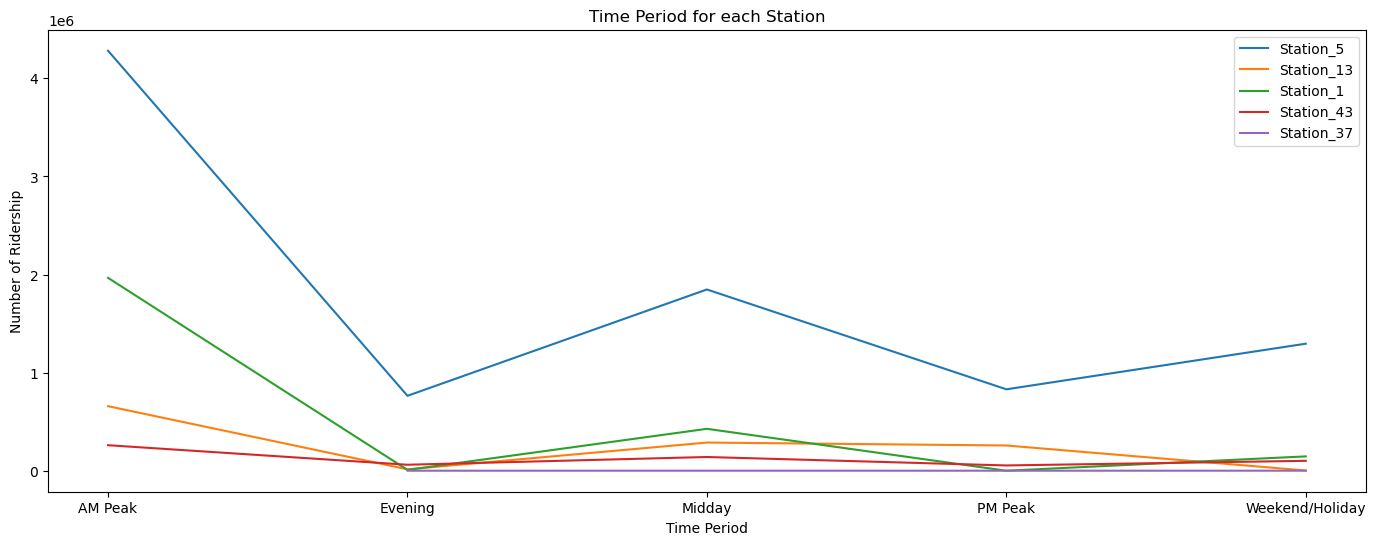

In [16]:
# Lets plot Ridership per Time Period for each Station

# Group by Station and Time Period and calculate the sum of ridership
grouped_station_time = df.groupby(['Station', 'Period']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM Peak', 'Midday', 'PM Peak', 'Evening', 'Weekend/Holiday']

# Convert 'Time Period' column to a categorical data type with the desired order
grouped_station_time['Period'] = pd.Categorical(grouped_station_time['Period'], categories=time_period_order, ordered=True)

# Create a list of stations for plotting
stations = grouped_station_time['Station'].sample(n=5, random_state=23).unique()

plt.figure(figsize=(17, 6))

# Plot each station with different symbology
for station in stations:
    station_data = grouped_station_time[grouped_station_time['Station'] == station]
    plt.plot(station_data['Period'], station_data['Ridership'], label=str(station))

plt.title('Time Period for each Station')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend();

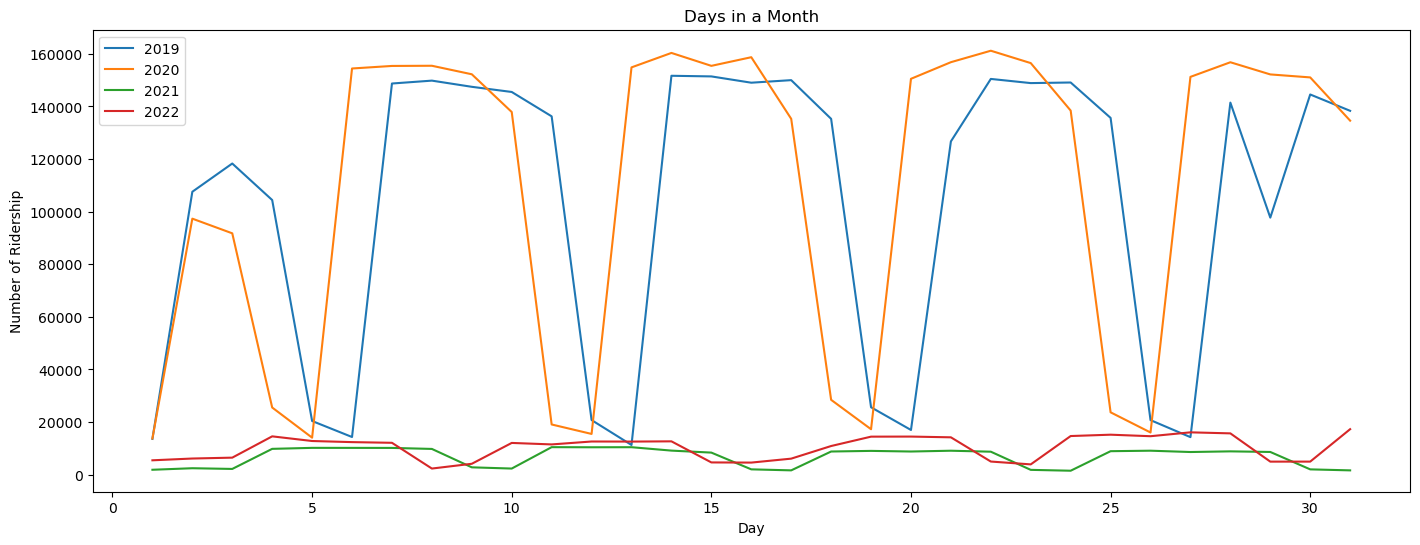

In [17]:
# Lets plot Ridership per Days in a Month say January

grouped_station_january = df[df['Month'] == 'January'].groupby(['Year', 'Day']).sum().reset_index()

# Create a list of year for plotting
stations = grouped_station_january['Year'].unique()
grouped_station_january = grouped_station_january.sort_values(by=['Day'])

plt.figure(figsize=(17, 6))

# Plot each year with different symbology
for station in stations:
    station_data = grouped_station_january[grouped_station_january['Year'] == station]
    plt.plot(station_data['Day'], station_data['Ridership'], label=str(station))

plt.title('Days in a Month')
plt.xlabel('Day')
plt.ylabel('Number of Ridership')
plt.legend();

# Feature Engineering

This snippet code encodes the cetagorical features.

*   In order to keep end of each month close to the first day of next month, I moved Day to a 2D space.
*   The same thing was tested for the week feature but it didn't turned out to work well.

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

def encode_categorical_features(df):
    df['Month_Num'] = df['Month'].map(month_mapping)

    def convert_day_to_circle(day):
        angle = 2 * np.pi * (day - 1) / 31  # Calculate the angle based on the day
        x = np.cos(angle)  # Compute the x-coordinate on the unit circle
        y = np.sin(angle)  # Compute the y-coordinate on the unit circle
        return x, y

    def convert_week_to_circle(week):
        angle = 2 * np.pi * (week - 1) / 53  # Calculate the angle based on the week
        x = np.cos(angle)  # Compute the x-coordinate on the unit circle
        y = np.sin(angle)  # Compute the y-coordinate on the unit circle
        return x, y

    categorical_features = ['Month', 'Corridor', 'Workday', 'Station', 'Period']

    df['day_x'], df['day_y'] = zip(*df['Day'].map(convert_day_to_circle))
    X = df.drop(columns=['Ridership', 'Day'], axis=1)  # Features (excluding the target column) and also Day which is already converted
    y = df['Ridership']  # Target column

    # Create a ColumnTransformer to apply OneHotEncoder to categorical features
    preprocessor = ColumnTransformer(
        transformers=[('', OneHotEncoder(), categorical_features)],
        remainder='passthrough'
    )

    # Apply the ColumnTransformer to encode categorical features
    X_encoded = preprocessor.fit_transform(X)

    # Convert the encoded features to a dense matrix
    X_encoded = X_encoded.toarray()

    feature_names_out = list(preprocessor.get_feature_names_out())
    # Convert the dense matrix to a DataFrame
    X_encoded = pd.DataFrame(X_encoded, columns=[item.split('__')[1] for item in feature_names_out])

    return X_encoded

This code snippet creates a grid of scatter plots for each combination of variables in the df, allowing us to visualize the relationships between them.


*   Note 1: This only detects numerical columns.
*   Note 2: It can only find linear relationships.
*   Note 3: Since Onehot encoding will increase the number of features drastically we would not encode categorical features for the calcualtion of correlations


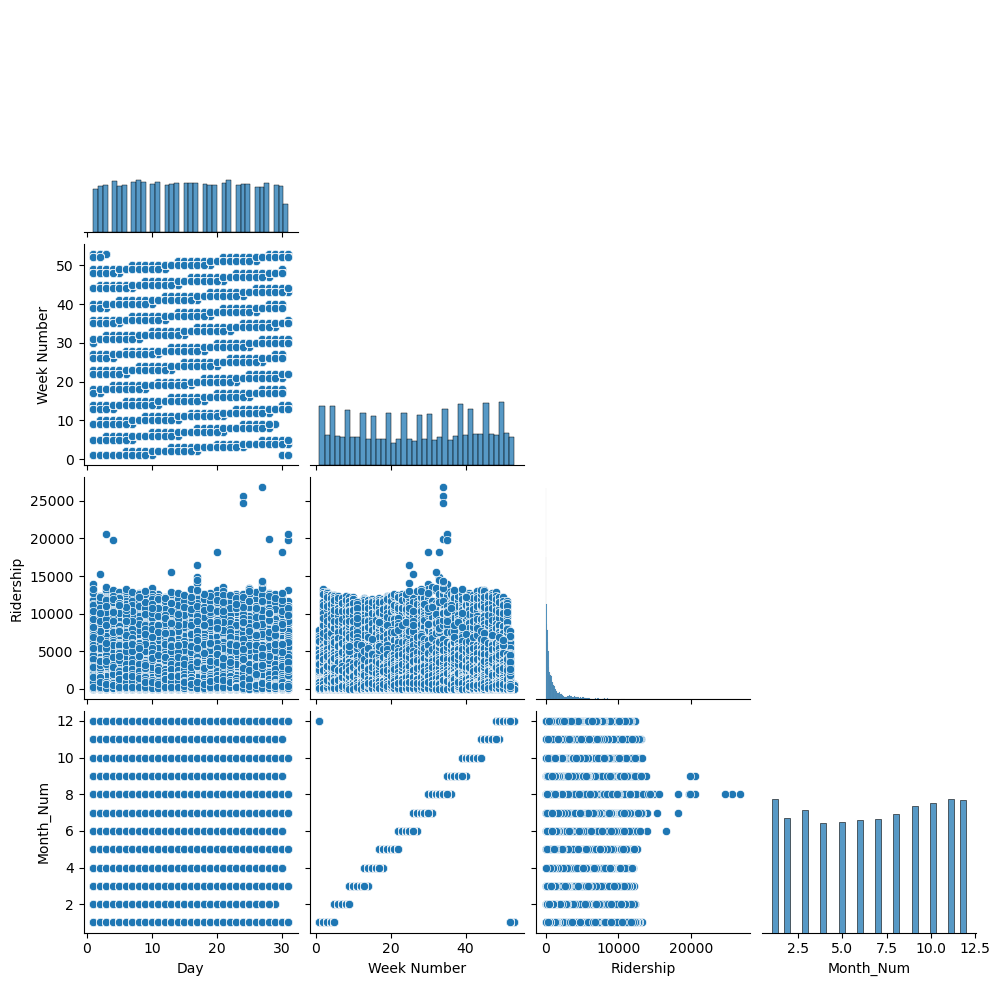

In [22]:
df['Month_Num'] = df['Month'].map(month_mapping)

df_rel =df.drop(columns=['Year', 'Month', 'N_trains', 'Covid19', 'Corridor', 'Workday', 'Station', 'Period'])

import seaborn as sns
sns.pairplot(df_rel, corner=True)

This code snippet demonstrates how to create a heatmap of the correlation values between variables in a DataFrame using seaborn.
*   Note 1: This only detects numerical columns.
*   Note 2: It can only find linear relationships.

 **Collinearity is obvious between Month_Num and Week Number. We can use PCA (we will lose Interpretability) or regularization methods**

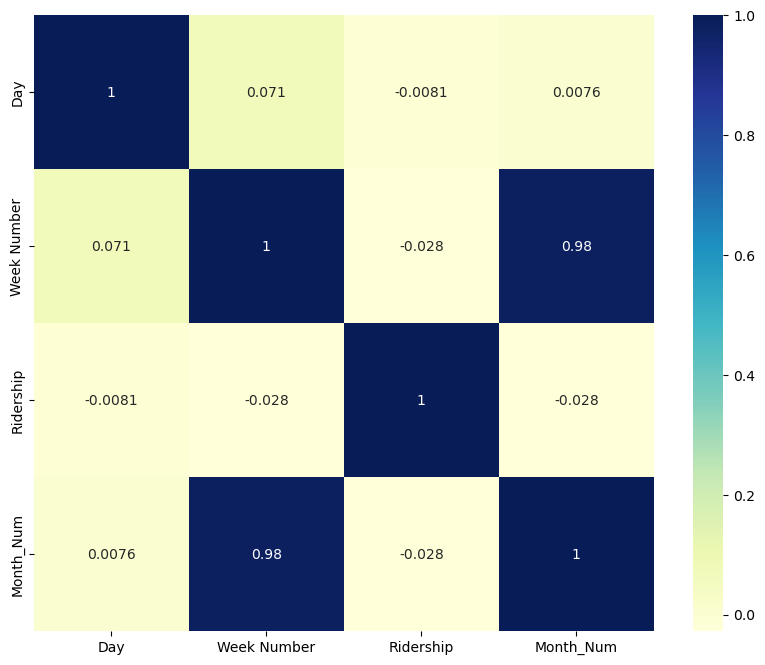

In [24]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with correlation values
sns.heatmap(df_rel.corr(), annot=True, cmap="YlGnBu");

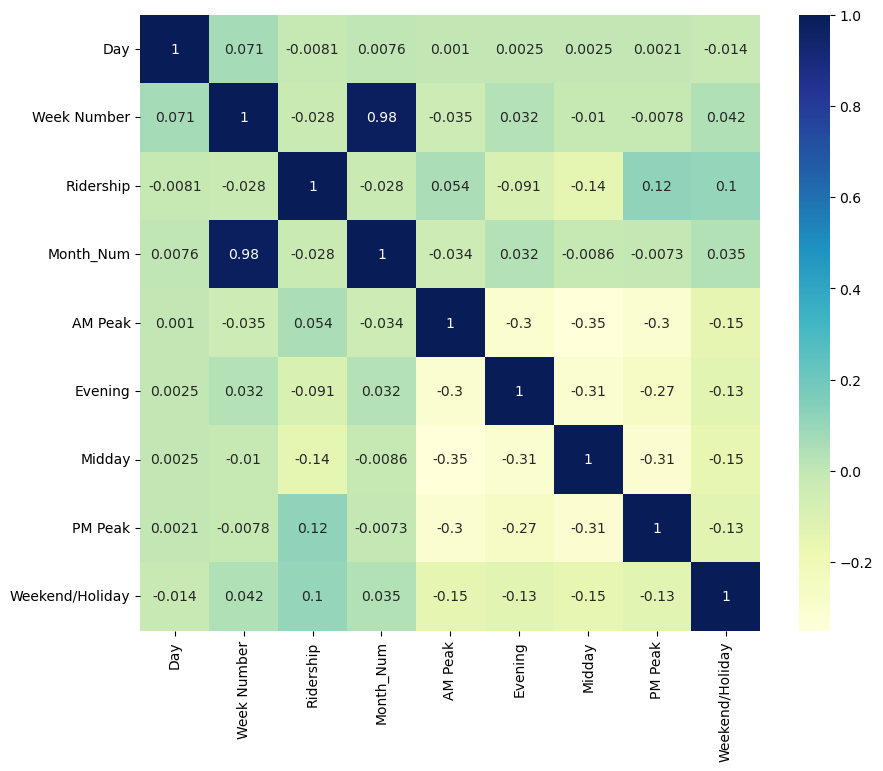

In [25]:
# Get the one-hot encoded representation of 'Time Period'
time_period_dummies = pd.get_dummies(df['Period'])
# Concatenate the dummy variables to the original dataframe
df_correlation = pd.concat([df_rel, time_period_dummies], axis=1)

plt.figure(figsize=(10, 8))
# Create the heatmap with correlation values
sns.heatmap(df_correlation.corr(), annot=True, cmap="YlGnBu");

Now Lets try to find the Mutual Information (MI) because the previous approaches only detect linear relationships.

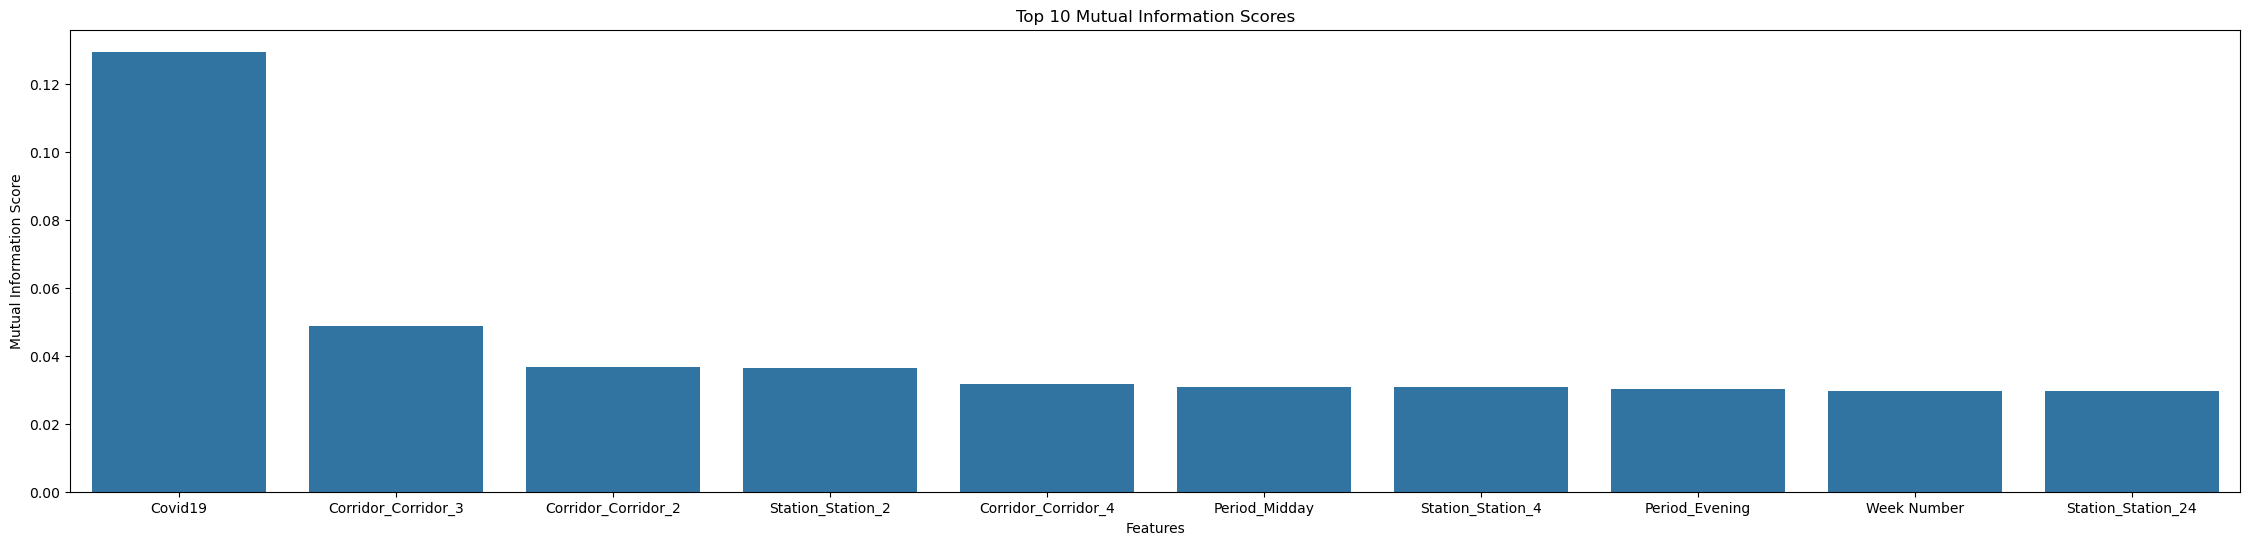

In [27]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

df = df.drop(columns=['Year', 'N_trains'])
x_mi = encode_categorical_features(df)
y_mi = df['Ridership']

def calculate_mutual_information(x_mi, y_mi):
    if isinstance(y_mi.iloc[0], str):  # Check if the target variable is categorical
        mi_scores = mutual_info_classif(x_mi, y_mi)
    else:
        mi_scores = mutual_info_regression(x_mi, y_mi)
    return mi_scores

# Assuming X is your feature matrix and y is your target column
mi_scores = calculate_mutual_information(x_mi, y_mi)
def plot_mutual_information(mi_scores, feature_names, top_n):
    sorted_indices = (-mi_scores).argsort()[:top_n]  # Get the indices of the top n scores
    top_mi_scores = mi_scores[sorted_indices]
    top_feature_names = feature_names[sorted_indices]

    plt.figure(figsize=(28, 6))
    sns.barplot(x=top_feature_names, y=top_mi_scores)
    plt.xlabel('Features')
    plt.ylabel('Mutual Information Score')
    plt.title('Top 10 Mutual Information Scores')
    plt.show()

# Assuming mi_scores contains the mutual information scores and feature_names contains the feature names
plot_mutual_information(mi_scores, x_mi.columns, top_n=10)

This snippet code finds degree of feature importance by using a random forest regressor. Two plots are visualized that are related to before and after encoding.

Before encoding:

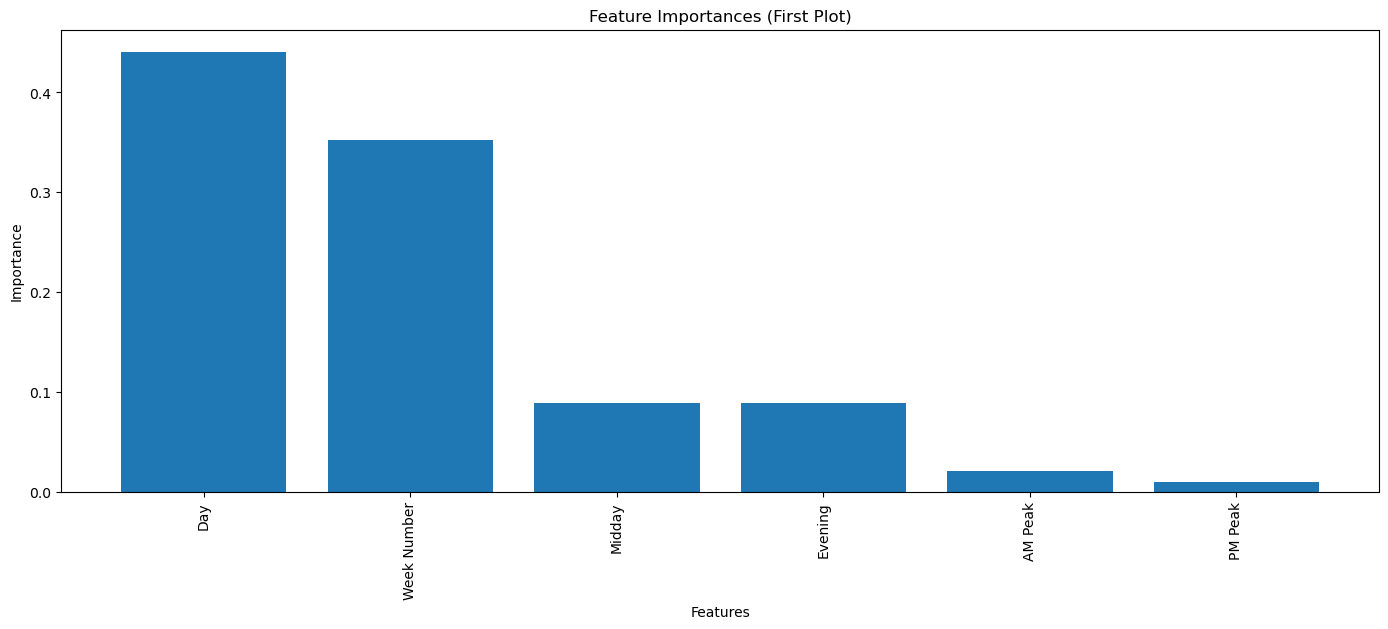

In [30]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create a random forest regressor
rf = RandomForestRegressor()

time_period_dummies = pd.get_dummies(df['Period'])
# Concatenate the dummy variables to the original dataframe
df_importance = pd.concat([df, time_period_dummies], axis=1)


# Select the features and target for the first plot
features_1 = df_importance[['Day', 'Week Number', 'AM Peak', 'Evening', 'Midday', 'PM Peak']]
target_1 = df_importance['Ridership']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=0.2, random_state=42)

# Fit the model to the first data
rf.fit(X_train_1, y_train_1)

# Get feature importances for the first plot
importances_1 = rf.feature_importances_

# Create a DataFrame with feature names and importances for the first plot
feature_importances_1 = pd.DataFrame({'Feature': features_1.columns, 'Importance': importances_1})

# Sort the features by importance in descending order for the first plot
feature_importances_1 = feature_importances_1.sort_values(by='Importance', ascending=False)


fig, ax = plt.subplots(figsize=(17, 6))

# Plot the feature importances for the first plot
ax.bar(feature_importances_1['Feature'], feature_importances_1['Importance'])
ax.set_xticks(range(len(feature_importances_1['Feature'])))
ax.set_xticklabels(feature_importances_1['Feature'], rotation=90)
ax.set_title('Feature Importances (First Plot)')
ax.set_xlabel('Features')
ax.set_ylabel('Importance');

After encoding:

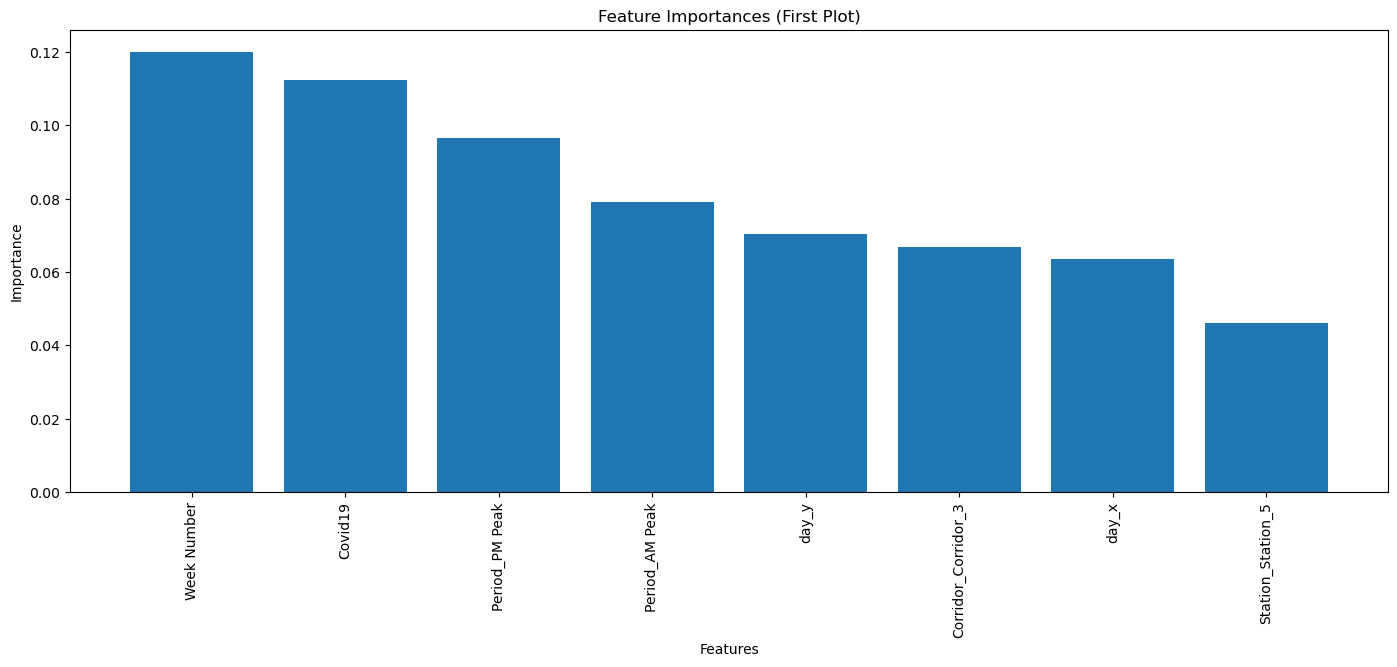

In [32]:
X_encoded = encode_categorical_features(df)
# Select the features and target for the second plot
features_2 = X_encoded
target_2 = df['Ridership']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size=0.2, random_state=42)

# Fit the model to the second data
rf.fit(X_train_2, y_train_2)

# Get feature importances for the second plot
importances_2 = rf.feature_importances_

# Create a DataFrame with feature names and importances for the second plot
feature_importances_2 = pd.DataFrame({'Feature': features_2.columns, 'Importance': importances_2})

# Sort the features by importance in descending order for the second plot
feature_importances_2 = feature_importances_2.sort_values(by='Importance', ascending=False)

# Select the top 10 important features for the second plot
top_features_2 = feature_importances_2.head(8)

fig, ax = plt.subplots(figsize=(17, 6))

# Plot the feature importances for the first plot
ax.bar(top_features_2['Feature'], top_features_2['Importance'])
ax.set_xticks(range(len(top_features_2['Feature'])))
ax.set_xticklabels(top_features_2['Feature'], rotation=90)
ax.set_title('Feature Importances (First Plot)')
ax.set_xlabel('Features')
ax.set_ylabel('Importance');

# Data Prepration for model training

Since we are working with timeseries data, in order for our evaluation to be fair the best practice is to train model based on the first 80% of the data and test it on last 20%.

In [35]:
# Since we're trying to predict the ridership for different stations we have to apply the 80% to each of the stations separately

def split_the_timeseries_data(df, X_encoded):
    # Create empty lists to store the train-test split data
    X_train = []
    X_test = []
    y_train = []
    y_test = []

    # Iterate over each unique station
    for station in df['Station'].unique():
        # Get the data for the current station
        station_data = X_encoded[X_encoded['Station_'+station] == 1]
        target_data = df.loc[X_encoded['Station_'+station] == 1, 'Ridership']

        # Determine the number of samples to include in the test set
        test_size = int(len(station_data) * 0.2)

        # Split the data into train and test sets
        station_X_train = station_data[:-test_size]
        station_X_test = station_data[-test_size:]
        station_y_train = target_data[:-test_size]
        station_y_test = target_data[-test_size:]

        # Append the station-specific data to the overall train-test split
        X_train.append(station_X_train)
        X_test.append(station_X_test)
        y_train.append(station_y_train)
        y_test.append(station_y_test)

    # Concatenate the train-test split data
    X_train = pd.concat(X_train)
    X_test = pd.concat(X_test)
    y_train = pd.concat(y_train)
    y_test = pd.concat(y_test)

    return X_train, X_test, y_train, y_test

In [36]:
X_encoded = encode_categorical_features(df)
X_train, X_test, y_train, y_test = split_the_timeseries_data(df, X_encoded)

# Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 1546.632382629213


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [39]:
def sns_jointplot(y_pred, y_test, denormalize=True):
  sns.jointplot(x=y_pred, y=y_test, kind='scatter')
  plt.xlabel('y_pred')
  plt.ylabel('y_label');

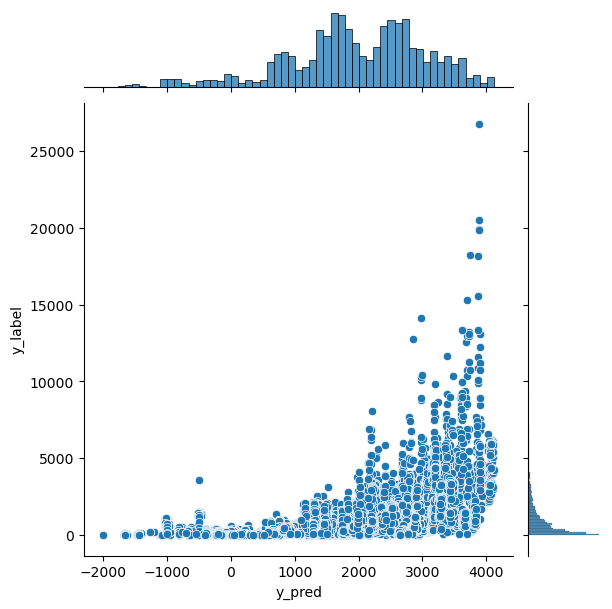

In [40]:
sns_jointplot(y_pred, y_test)

# Refereces



1.   https://ascelibrary.org/doi/abs/10.1061/9780784483053.261
2.   http://r.meteo.uni.wroc.pl/web/packages/xgboost/xgboost.pdf
3.   https://www.mdpi.com/2071-1050/8/11/1100
4.   https://towardsdatascience.com/offsetting-the-model-logic-to-implementation-7e333bc25798
5.   https://bookdown.org/roback/bookdown-BeyondMLR/ch-poissonreg.html

